In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
from scipy import stats

# Merg & Clean Data

In [54]:
# read and clean 2015 data
fifteen_csv = "Resources/2015.csv"
fifteen_df = pd.read_csv(fifteen_csv)
fifteen_df = fifteen_df[["Country", "Happiness Rank", "Happiness Score", "Family", "Health (Life Expectancy)",
                         "Freedom", "Trust (Government Corruption)", "Generosity"]]
fifteen_df = fifteen_df.rename(columns={"Happiness Rank": "Rank (2015)",
                                        "Happiness Score": "Happiness Score (2015)",
                                        "Family": "Family (2015)",
                                        "Health (Life Expectancy)": "Health (2015)",
                                        "Freedom": "Freedom (2015)",
                                       "Trust (Government Corruption)": "Perceptions of Corruption (2015)",
                                       "Generosity": "Generosity (2015)"})
fifteen_df.head()

,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015)
0,Switzerland,1,7.587,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32261,0.90563,0.63297,0.32957,0.45811


In [55]:
# read and clean 2016 data
sixteen_csv = "Resources/2016.csv"
sixteen_df = pd.read_csv(sixteen_csv)
sixteen_df = sixteen_df[["Country", "Happiness Rank", "Happiness Score", "Family", "Health (Life Expectancy)",
                         "Freedom", "Trust (Government Corruption)", "Generosity"]]
sixteen_df = sixteen_df.rename(columns={"Happiness Rank": "Rank (2016)",
                                        "Happiness Score": "Happiness Score (2016)",
                                        "Family": "Family (2016)",
                                        "Health (Life Expectancy)": "Health (2016)",
                                        "Freedom": "Freedom (2016)",
                                       "Trust (Government Corruption)": "Perceptions of Corruption (2016)",
                                       "Generosity": "Generosity (2016)"})
sixteen_df.head()

,Country,Rank (2016),Happiness Score (2016),Family (2016),Health (2016),Freedom (2016),Perceptions of Corruption (2016),Generosity (2016)
0,Denmark,1,7.526,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.13464,0.81091,0.57104,0.41004,0.25492


In [56]:
# read and clean 2017 data
seventeen_csv = "Resources/2017.csv"
seventeen_df = pd.read_csv(seventeen_csv)
seventeen_df = seventeen_df[["Country", "Happiness.Rank", "Happiness.Score", "Family", "Health..Life.Expectancy.",
                         "Freedom", "Trust..Government.Corruption.", "Generosity"]]
seventeen_df = seventeen_df.rename(columns={"Happiness.Rank": "Rank (2017)",
                                        "Happiness.Score": "Happiness Score (2017)",
                                        "Family": "Family (2017)",
                                        "Health..Life.Expectancy.": "Health (2017)",
                                        "Freedom": "Freedom (2017)",
                                       "Trust..Government.Corruption.": "Perceptions of Corruption (2017)",
                                       "Generosity": "Generosity (2017)"})
seventeen_df.head()

,Country,Rank (2017),Happiness Score (2017),Family (2017),Health (2017),Freedom (2017),Perceptions of Corruption (2017),Generosity (2017)
0,Norway,1,7.537,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,2,7.522,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,3,7.504,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,4,7.494,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,5,7.469,1.540247,0.809158,0.617951,0.382612,0.245483


In [57]:
# read and clean 2018 data
eighteen_csv = "Resources/2018.csv"
eighteen_df = pd.read_csv(eighteen_csv)
eighteen_df = eighteen_df[["Country or region", "Overall rank", "Score", "Social support", "Healthy life expectancy",
                         "Freedom to make life choices", "Perceptions of corruption", "Generosity"]]
eighteen_df = eighteen_df.rename(columns={"Country or region": "Country",
                                          "Overall rank": "Rank (2018)",
                                        "Score": "Happiness Score (2018)",
                                        "Social support": "Family (2018)",
                                        "Healthy life expectancy": "Health (2018)",
                                        "Freedom to make life choices": "Freedom (2018)",
                                       "Perceptions of corruption": "Perceptions of Corruption (2018)",
                                       "Generosity": "Generosity (2018)"})
eighteen_df.head()

,Country,Rank (2018),Happiness Score (2018),Family (2018),Health (2018),Freedom (2018),Perceptions of Corruption (2018),Generosity (2018)
0,Finland,1,7.632,1.592,0.874,0.681,0.393,0.202
1,Norway,2,7.594,1.582,0.861,0.686,0.340,0.286
2,Denmark,3,7.555,1.590,0.868,0.683,0.408,0.284
3,Iceland,4,7.495,1.644,0.914,0.677,0.138,0.353
4,Switzerland,5,7.487,1.549,0.927,0.660,0.357,0.256


In [58]:
# read and clean 2019 data
nineteen_csv = "Resources/2019.csv"
nineteen_df = pd.read_csv(nineteen_csv)
nineteen_df = nineteen_df[["Country or region", "Overall rank", "Score", "Social support", "Healthy life expectancy",
                         "Freedom to make life choices", "Perceptions of corruption", "Generosity"]]
nineteen_df = nineteen_df.rename(columns={"Country or region": "Country",
                                          "Overall rank": "Rank (2019)",
                                        "Score": "Happiness Score (2019)",
                                        "Social support": "Family (2019)",
                                        "Healthy life expectancy": "Health (2019)",
                                        "Freedom to make life choices": "Freedom (2019)",
                                       "Perceptions of corruption": "Perceptions of Corruption (2019)",
                                       "Generosity": "Generosity (2019)"})
nineteen_df.head()

,Country,Rank (2019),Happiness Score (2019),Family (2019),Health (2019),Freedom (2019),Perceptions of Corruption (2019),Generosity (2019)
0,Finland,1,7.769,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.522,0.999,0.557,0.298,0.322


In [59]:
# read and clean 2022 data
twenty_two_csv = "Resources/2022.csv"
twenty_two_df = pd.read_csv(twenty_two_csv)
twenty_two_df = twenty_two_df[["Country", "RANK", "Happiness score", "Explained by: Social support",
                               "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices",
                               "Explained by: Perceptions of corruption", "Explained by: Generosity"]]
twenty_two_df = twenty_two_df.rename(columns={"RANK": "Rank (2022)",
                                        "Happiness score": "Happiness Score (2022)",
                                        "Explained by: Social support": "Family (2022)",
                                        "Explained by: Healthy life expectancy": "Health (2022)",
                                        "Explained by: Freedom to make life choices": "Freedom (2022)",
                                       "Explained by: Perceptions of corruption": "Perceptions of Corruption (2022)",
                                       "Explained by: Generosity": "Generosity (2022)"})
twenty_two_df.head()

,Country,Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,Finland,1,7.821,1.258,0.775,0.736,0.534,0.109
1,Denmark,2,7.636,1.243,0.777,0.719,0.532,0.188
2,Iceland,3,7.557,1.320,0.803,0.718,0.191,0.270
3,Switzerland,4,7.512,1.226,0.822,0.677,0.461,0.147
4,Netherlands,5,7.415,1.206,0.787,0.651,0.419,0.271


In [60]:
#merge 2015 to 2016
merge_fifteen_sixteen_df = pd.merge(fifteen_df, sixteen_df, on="Country", how="outer").dropna()
merge_fifteen_sixteen_df.head()
merge_fifteen_sixteen_df.count()

Country                             151
Rank (2015)                         151
Happiness Score (2015)              151
Family (2015)                       151
Health (2015)                       151
Freedom (2015)                      151
Perceptions of Corruption (2015)    151
Generosity (2015)                   151
Rank (2016)                         151
Happiness Score (2016)              151
Family (2016)                       151
Health (2016)                       151
Freedom (2016)                      151
Perceptions of Corruption (2016)    151
Generosity (2016)                   151
dtype: int64

In [61]:
#merge in 2017
merge_in_seventeen_df = pd.merge(merge_fifteen_sixteen_df, seventeen_df, on="Country", how="outer").dropna()
merge_in_seventeen_df.head()
merge_in_seventeen_df.count()

Country                             146
Rank (2015)                         146
Happiness Score (2015)              146
Family (2015)                       146
Health (2015)                       146
Freedom (2015)                      146
Perceptions of Corruption (2015)    146
Generosity (2015)                   146
Rank (2016)                         146
Happiness Score (2016)              146
Family (2016)                       146
Health (2016)                       146
Freedom (2016)                      146
Perceptions of Corruption (2016)    146
Generosity (2016)                   146
Rank (2017)                         146
Happiness Score (2017)              146
Family (2017)                       146
Health (2017)                       146
Freedom (2017)                      146
Perceptions of Corruption (2017)    146
Generosity (2017)                   146
dtype: int64

In [62]:
#merge in 2018
merge_in_eighteen_df = pd.merge(merge_in_seventeen_df, eighteen_df, on="Country", how="outer").dropna()
merge_in_seventeen_df.head()
merge_in_seventeen_df.count()

Country                             146
Rank (2015)                         146
Happiness Score (2015)              146
Family (2015)                       146
Health (2015)                       146
Freedom (2015)                      146
Perceptions of Corruption (2015)    146
Generosity (2015)                   146
Rank (2016)                         146
Happiness Score (2016)              146
Family (2016)                       146
Health (2016)                       146
Freedom (2016)                      146
Perceptions of Corruption (2016)    146
Generosity (2016)                   146
Rank (2017)                         146
Happiness Score (2017)              146
Family (2017)                       146
Health (2017)                       146
Freedom (2017)                      146
Perceptions of Corruption (2017)    146
Generosity (2017)                   146
dtype: int64

In [63]:
#merge in 2019
merge_in_nineteen_df = pd.merge(merge_in_eighteen_df, nineteen_df, on="Country", how="outer").dropna()
merge_in_nineteen_df.head()
merge_in_nineteen_df.count()

Country                             140
Rank (2015)                         140
Happiness Score (2015)              140
Family (2015)                       140
Health (2015)                       140
Freedom (2015)                      140
Perceptions of Corruption (2015)    140
Generosity (2015)                   140
Rank (2016)                         140
Happiness Score (2016)              140
Family (2016)                       140
Health (2016)                       140
Freedom (2016)                      140
Perceptions of Corruption (2016)    140
Generosity (2016)                   140
Rank (2017)                         140
Happiness Score (2017)              140
Family (2017)                       140
Health (2017)                       140
Freedom (2017)                      140
Perceptions of Corruption (2017)    140
Generosity (2017)                   140
Rank (2018)                         140
Happiness Score (2018)              140
Family (2018)                       140


In [64]:
#merge in 2022
merged_df = pd.merge(merge_in_nineteen_df, twenty_two_df, on="Country", how="outer").dropna()
merged_df.count()

Country                             116
Rank (2015)                         116
Happiness Score (2015)              116
Family (2015)                       116
Health (2015)                       116
Freedom (2015)                      116
Perceptions of Corruption (2015)    116
Generosity (2015)                   116
Rank (2016)                         116
Happiness Score (2016)              116
Family (2016)                       116
Health (2016)                       116
Freedom (2016)                      116
Perceptions of Corruption (2016)    116
Generosity (2016)                   116
Rank (2017)                         116
Happiness Score (2017)              116
Family (2017)                       116
Health (2017)                       116
Freedom (2017)                      116
Perceptions of Corruption (2017)    116
Generosity (2017)                   116
Rank (2018)                         116
Happiness Score (2018)              116
Family (2018)                       116


In [65]:
#final DataFrame
merged_df.head()

,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),Happiness Score (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217


# Output to CSV

In [66]:
merged_df.to_csv("Output_data/Happiness_df.csv", index_label="Index")

# Find mean for Happiness (2015-2019)

In [67]:
#grab only Happines data
Happiness_Score_df = merged_df[["Country", "Happiness Score (2015)", "Happiness Score (2016)",
                     "Happiness Score (2017)", "Happiness Score (2018)",
                     "Happiness Score (2019)"]]
Happiness_Score_df.head()

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019)
0,Switzerland,7.587,7.509,7.494,7.487,7.480
1,Iceland,7.561,7.501,7.504,7.495,7.494
2,Denmark,7.527,7.526,7.522,7.555,7.600
3,Norway,7.522,7.498,7.537,7.594,7.554
4,Canada,7.427,7.404,7.316,7.328,7.278


In [68]:
#find mean for each year
Happiness_Year_Mean = Happiness_Score_df.mean()
Happiness_Year_Mean

Happiness Score (2015)    5.514328
Happiness Score (2016)    5.525414
Happiness Score (2017)    5.541164
Happiness Score (2018)    5.576888
Happiness Score (2019)    5.613086
dtype: float64

In [69]:
#Flip data to find mean for countries
Happiness_Score_Flipped_df = Happiness_Score_df.set_index("Country").T
Happiness_Score_Flipped_df

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Senegal,Gabon,Cambodia,Tanzania,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Benin,Togo
Happiness Score (2015),7.587,7.561,7.527,7.522,7.427,7.406,7.378,7.364,7.286,7.284,...,3.904,3.896,3.819,3.781,3.656,3.655,3.587,3.575,3.340,2.839
Happiness Score (2016),7.509,7.501,7.526,7.498,7.404,7.413,7.339,7.291,7.334,7.313,...,4.219,4.121,3.907,3.666,3.607,3.916,3.739,3.360,3.484,3.303
Happiness Score (2017),7.494,7.504,7.522,7.537,7.316,7.469,7.377,7.284,7.314,7.284,...,4.535,4.465,4.168,3.349,3.507,4.180,4.032,3.794,3.657,3.495
Happiness Score (2018),7.487,7.495,7.555,7.594,7.328,7.632,7.441,7.314,7.324,7.272,...,4.631,4.758,4.433,3.303,3.964,4.671,4.424,3.632,4.141,3.999
Happiness Score (2019),7.480,7.494,7.600,7.554,7.278,7.769,7.488,7.343,7.307,7.228,...,4.681,4.799,4.700,3.231,4.534,4.944,4.587,3.203,4.883,4.085


In [70]:
#find mean for countries
Happiness_Score_mean = Happiness_Score_Flipped_df.mean()
Happiness_Score_mean

Country
Switzerland     7.5114
Iceland         7.5110
Denmark         7.5460
Norway          7.5410
Canada          7.3506
                 ...  
Ivory Coast     4.2732
Burkina Faso    4.0738
Afghanistan     3.5128
Benin           3.9010
Togo            3.5442
Length: 116, dtype: float64

In [71]:
#find mean for all data from 2015 - 2019
h_fifteen_sum = Happiness_Score_df["Happiness Score (2015)"].sum()
h_sixteen_sum = Happiness_Score_df["Happiness Score (2016)"].sum()
h_seventeen_sum = Happiness_Score_df["Happiness Score (2017)"].sum()
h_eighteen_sum = Happiness_Score_df["Happiness Score (2018)"].sum()
h_nineteen_sum = Happiness_Score_df["Happiness Score (2019)"].sum()
h_count = Happiness_Score_df["Country"].count()
h_total_mean = (h_fifteen_sum+h_sixteen_sum+h_seventeen_sum+h_eighteen_sum+h_nineteen_sum)/(h_count*5)
h_total_mean

5.554175861411259

# Find mean for Goverment Trust (2015-2019)

In [72]:
# grab on goverment trust data
Perceptions_of_Corruption_df = merged_df[["Country", "Perceptions of Corruption (2015)", "Perceptions of Corruption (2016)",
                     "Perceptions of Corruption (2017)", "Perceptions of Corruption (2018)",
                     "Perceptions of Corruption (2019)"]]
Perceptions_of_Corruption_df.head()

,Country,Perceptions of Corruption (2015),Perceptions of Corruption (2016),Perceptions of Corruption (2017),Perceptions of Corruption (2018),Perceptions of Corruption (2019)
0,Switzerland,0.41978,0.41203,0.367007,0.357,0.343
1,Iceland,0.14145,0.14975,0.153527,0.138,0.118
2,Denmark,0.48357,0.44453,0.400770,0.408,0.410
3,Norway,0.36503,0.35776,0.315964,0.340,0.341
4,Canada,0.32957,0.31329,0.287372,0.291,0.308


In [73]:
# find mean for years
year_mean = Perceptions_of_Corruption_df.mean()
year_mean

Perceptions of Corruption (2015)    0.130612
Perceptions of Corruption (2016)    0.127437
Perceptions of Corruption (2017)    0.116490
Perceptions of Corruption (2018)    0.109922
Perceptions of Corruption (2019)    0.106129
dtype: float64

In [74]:
# flip data to find mean for years
Perceptions_of_Corruption_Flipped_df = Perceptions_of_Corruption_df.set_index("Country").T
Perceptions_of_Corruption_Flipped_df

Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,Australia,...,Senegal,Gabon,Cambodia,Tanzania,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Benin,Togo
Perceptions of Corruption (2015),0.419780,0.141450,0.48357,0.365030,0.329570,0.413720,0.318140,0.438440,0.429220,0.356370,...,0.10713,0.110910,0.072470,0.057470,0.121390,0.179220,0.128320,0.097190,0.080100,0.107310
Perceptions of Corruption (2016),0.412030,0.149750,0.44453,0.357760,0.313290,0.410040,0.299270,0.408670,0.419040,0.323310,...,0.11681,0.093140,0.080920,0.050990,0.119200,0.155300,0.125330,0.071120,0.066810,0.115870
Perceptions of Corruption (2017),0.367007,0.153527,0.40077,0.315964,0.287372,0.382612,0.282662,0.384399,0.382817,0.301184,...,0.11546,0.076047,0.068106,0.066035,0.110938,0.130062,0.120328,0.061158,0.060929,0.095665
Perceptions of Corruption (2018),0.357000,0.138000,0.40800,0.340000,0.291000,0.393000,0.295000,0.383000,0.389000,0.302000,...,0.08200,0.052000,0.065000,0.097000,0.094000,0.103000,0.128000,0.036000,0.067000,0.101000
Perceptions of Corruption (2019),0.343000,0.118000,0.41000,0.341000,0.308000,0.393000,0.298000,0.373000,0.380000,0.290000,...,0.07200,0.055000,0.062000,0.147000,0.086000,0.090000,0.113000,0.025000,0.082000,0.085000


In [75]:
#find mean for all data from 2015 - 2019
c_fifteen_sum = Perceptions_of_Corruption_df["Perceptions of Corruption (2015)"].sum()
c_sixteen_sum = Perceptions_of_Corruption_df["Perceptions of Corruption (2016)"].sum()
c_seventeen_sum = Perceptions_of_Corruption_df["Perceptions of Corruption (2017)"].sum()
c_eighteen_sum = Perceptions_of_Corruption_df["Perceptions of Corruption (2018)"].sum()
c_nineteen_sum = Perceptions_of_Corruption_df["Perceptions of Corruption (2019)"].sum()
c_count = Perceptions_of_Corruption_df["Country"].count()
c_total_mean = (c_fifteen_sum+c_sixteen_sum+c_seventeen_sum+c_eighteen_sum+c_nineteen_sum)/(c_count*5)
c_total_mean

0.11811811402945453

# Create DataFrame and Figure (2015-2019)

In [76]:
# create DataFrame of goverment trust and happiness means
country_name = Perceptions_of_Corruption_df["Country"].unique()
country_mean = Perceptions_of_Corruption_Flipped_df.mean()
country_mean_df = pd.DataFrame({"Perceptions of Corruption Mean": country_mean,
                                "Happiness Score Mean": Happiness_Score_mean})
country_mean_df = country_mean_df.sort_values("Perceptions of Corruption Mean", ascending=False)
country_mean_df.head(10)

,Perceptions of Corruption Mean,Happiness Score Mean
Country,,
Singapore,0.467256,6.5428
Denmark,0.429374,7.5460
New Zealand,0.400015,7.3130
Finland,0.398474,7.5378
Sweden,0.397502,7.3192
Switzerland,0.379763,7.5114
Norway,0.343951,7.5410
Australia,0.314573,7.2762
Canada,0.305846,7.3506


In [77]:
# Define a function to create Linear Regression plots
def linear_regrression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    return line_eq

The r-value is: 0.3211669952184197


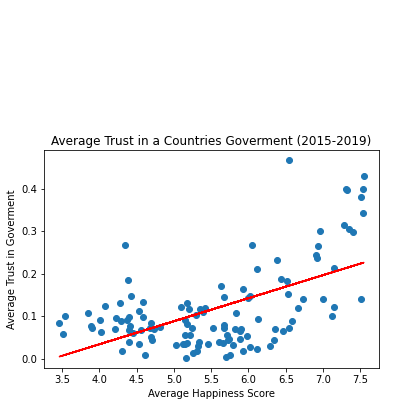

In [78]:
# plot data
avg_country_plot = linear_regrression(country_mean_df["Happiness Score Mean"], country_mean_df["Perceptions of Corruption Mean"])
plt.title("Average Trust in a Countries Goverment (2015-2019)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Average Trust in Goverment")
plt.savefig("Figure_File/Coruption1.png")
plt.show()

# Create DataFrame and Figure (2022)

In [79]:
# bring in latest data to work with
latest_df = merged_df[["Country", "Perceptions of Corruption (2022)", "Happiness Score (2022)"]]
latest_df = latest_df.sort_values("Perceptions of Corruption (2022)", ascending=False)
latest_df.head(10)

,Country,Perceptions of Corruption (2022),Happiness Score (2022)
21,Singapore,0.587,6.480
5,Finland,0.534,7.821
2,Denmark,0.532,7.636
7,Sweden,0.512,7.384
8,New Zealand,0.483,7.200
3,Norway,0.474,7.365
0,Switzerland,0.461,7.512
6,Netherlands,0.419,7.415
17,Ireland,0.408,7.041
4,Canada,0.368,7.025


In [80]:
# find means
latest_df.mean()

Perceptions of Corruption (2022)    0.151750
Happiness Score (2022)              5.667784
dtype: float64

The r-value is: 0.25373272657445173


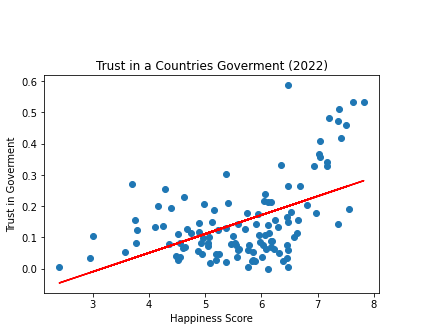

In [81]:
# plot data
latest_country_plot = linear_regrression(latest_df["Happiness Score (2022)"],
                                      latest_df["Perceptions of Corruption (2022)"])
plt.title("Trust in a Countries Goverment (2022)")
plt.xlabel("Happiness Score")
plt.ylabel("Trust in Goverment")
plt.savefig("Figure_File/Coruption2.png")
plt.show()